# Feature importance (agg-dataset)

In [1]:
import pandas as pd
import numpy  as np

In [2]:
df_trn = pd.read_csv('../data/train-agg.csv')
df_trn.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,pricing_strategy_transactions__AmountPositive_month_sum,pricing_strategy_transactions__AmountPositive_month_count,pricing_strategy_transactions__AmountPositive_month_min,pricing_strategy_transactions__AmountPositive_month_max,pricing_strategy_transactions__AmountPositive_month_avg,pricing_strategy_transactions__AmountPositive_global_sum,pricing_strategy_transactions__AmountPositive_global_count,pricing_strategy_transactions__AmountPositive_global_min,pricing_strategy_transactions__AmountPositive_global_max,pricing_strategy_transactions__AmountPositive_global_avg
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,0.0,0,1.000000e+09,-1.000000e+09,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1000.0,1,1.000000e+03,1.000000e+03,1000.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1000.0,2,0.000000e+00,1.000000e+03,500.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1500.0,3,0.000000e+00,1.000000e+03,500.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,21500.0,4,0.000000e+00,2.000000e+04,5375.0


In [3]:
columns4drop = [
    'TransactionId',
    'BatchId',
    'AccountId',
    'SubscriptionId',
    'CustomerId',
    'CurrencyCode',
    'CountryCode',
    'ProviderId',
    'ProductId',
    'ProductCategory',
    'ChannelId',
    'TransactionStartTime',
    'PricingStrategy'
]

In [4]:
df_trn_cut = df_trn.drop(columns=columns4drop, axis=1)

In [11]:
df_trn_cut.head()

,Amount,Value,FraudResult,product_transactions__Value_week_sum,product_transactions__Value_week_count,product_transactions__Value_week_min,product_transactions__Value_week_max,product_transactions__Value_week_avg,product_transactions__Value_month_sum,product_transactions__Value_month_count,...,pricing_strategy_transactions__AmountPositive_month_sum,pricing_strategy_transactions__AmountPositive_month_count,pricing_strategy_transactions__AmountPositive_month_min,pricing_strategy_transactions__AmountPositive_month_max,pricing_strategy_transactions__AmountPositive_month_avg,pricing_strategy_transactions__AmountPositive_global_sum,pricing_strategy_transactions__AmountPositive_global_count,pricing_strategy_transactions__AmountPositive_global_min,pricing_strategy_transactions__AmountPositive_global_max,pricing_strategy_transactions__AmountPositive_global_avg
0,0.092004,1000,0,0,0,1.000000e+09,-1.000000e+09,0.0,0,0,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,0.0,0,1.000000e+09,-1.000000e+09,0.0
1,0.091910,20,0,0,0,1.000000e+09,-1.000000e+09,0.0,0,0,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1000.0,1,1.000000e+03,1.000000e+03,1000.0
2,0.091958,500,0,0,0,1.000000e+09,-1.000000e+09,0.0,0,0,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1000.0,2,0.000000e+00,1.000000e+03,500.0
3,0.093750,21800,0,0,0,1.000000e+09,-1.000000e+09,0.0,0,0,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,1500.0,3,0.000000e+00,1.000000e+03,500.0
4,0.091853,644,0,0,0,1.000000e+09,-1.000000e+09,0.0,0,0,...,0.0,0,1.000000e+09,-1.000000e+09,0.0,21500.0,4,0.000000e+00,2.000000e+04,5375.0


In [15]:
X_trn_cut = df_trn_cut.drop(columns=['FraudResult'], axis=1)
y_trn_cut = df_trn_cut['FraudResult']

### Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
def scaleColumns(data, cols_to_scale, scaler):
    for col in cols_to_scale:
        data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])))
    return data

In [12]:
list(df_trn_cut.columns)

Index(['Amount', 'Value', 'FraudResult',
       'product_transactions__Value_week_sum',
       'product_transactions__Value_week_count',
       'product_transactions__Value_week_min',
       'product_transactions__Value_week_max',
       'product_transactions__Value_week_avg',
       'product_transactions__Value_month_sum',
       'product_transactions__Value_month_count',
       ...
       'pricing_strategy_transactions__AmountPositive_month_sum',
       'pricing_strategy_transactions__AmountPositive_month_count',
       'pricing_strategy_transactions__AmountPositive_month_min',
       'pricing_strategy_transactions__AmountPositive_month_max',
       'pricing_strategy_transactions__AmountPositive_month_avg',
       'pricing_strategy_transactions__AmountPositive_global_sum',
       'pricing_strategy_transactions__AmountPositive_global_count',
       'pricing_strategy_transactions__AmountPositive_global_min',
       'pricing_strategy_transactions__AmountPositive_global_max',
       'pri

In [13]:
df_trn_cut_sc = scaleColumns(df_trn_cut, list(df_trn_cut.columns), MinMaxScaler())

In [14]:
X_trn_cut_sc = df_trn_cut_sc.drop(columns=['FraudResult'], axis=1)
y_trn_cut_sc = df_trn_cut_sc['FraudResult']

## Univariate Selection $\chi^2$

use the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_trn_cut_sc, y_trn_cut_sc)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_trn_cut_sc.columns)

In [26]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
featureScores.nlargest(10, 'Score').values  #print 10 best features

array([['Value', 4762.58280938818],
       ['account_product_transactions__AmountPositive_global_sum',
        883.5489642988686],
       ['account_provider_transactions__AmountPositive_global_avg',
        739.34050291032],
       ['account_product_category_transactions__AmountPositive_global_sum',
        691.6696851909943],
       ['account_provider_transactions__Value_global_avg',
        570.9798594493061],
       ['account_provider_transactions__AmountPositive_global_sum',
        462.555515436121],
       ['account_channel_transactions__AmountPositive_global_sum',
        384.40934158227446],
       ['account_product_transactions__AmountPositive_global_avg',
        383.88619153723374],
       ['account_transactions__AmountPositive_global_sum',
        381.2755669364191],
       ['account_pricing_strategy_transactions__AmountPositive_global_sum',
        372.56560008712546]], dtype=object)

In [58]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']  #naming the dataframe columns
featureScores.nlargest(15, 'Score').values  #print 10 best features

array([['Value', 4762.58280938818],
       ['account_product_transactions__AmountPositive_global_sum',
        883.5489642988686],
       ['account_provider_transactions__AmountPositive_global_avg',
        739.34050291032],
       ['account_product_category_transactions__AmountPositive_global_sum',
        691.6696851909943],
       ['account_provider_transactions__Value_global_avg',
        570.9798594493061],
       ['account_provider_transactions__AmountPositive_global_sum',
        462.555515436121],
       ['account_channel_transactions__AmountPositive_global_sum',
        384.40934158227446],
       ['account_product_transactions__AmountPositive_global_avg',
        383.88619153723374],
       ['account_transactions__AmountPositive_global_sum',
        381.2755669364191],
       ['account_pricing_strategy_transactions__AmountPositive_global_sum',
        372.56560008712546],
       ['account_product_category_transactions__AmountPositive_global_avg',
        356.2747491337349],
 

## Feature Importance with Tree Based Classifiers

use Extra Tree Classifier for extracting the top 10 features for the dataset

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [20]:
model = ExtraTreesClassifier()
model.fit(X_trn_cut, y_trn_cut)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

/home/abogatyrov/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.00936002e-01 9.38429277e-02 1.44762621e-03 3.11019989e-03
 2.45169361e-04 1.50568454e-03 2.10717818e-03 2.58222471e-03
 2.52434754e-03 0.00000000e+00 3.67754041e-04 1.90838164e-03
 6.40120993e-03 4.82093991e-03 5.19615601e-04 2.23582518e-03
 2.51416915e-03 1.73060725e-04 2.99778956e-03 5.07525694e-07
 2.26636278e-04 0.00000000e+00 0.00000000e+00 1.78232777e-03
 1.26911198e-04 3.55758131e-05 6.27326880e-09 1.52521203e-08
 5.08798264e-03 6.93517098e-05 0.00000000e+00 2.94354463e-08
 2.80623237e-03 1.28245531e-03 3.35701282e-06 2.03862566e-03
 6.64246642e-04 7.38975520e-04 6.92242901e-05 2.86505365e-06
 0.00000000e+00 0.00000000e+00 2.09184324e-03 1.74791332e-03
 8.63097197e-04 6.27847290e-03 6.30798370e-03 2.21738420e-03
 1.61634631e-03 2.36502140e-05 1.23921424e-03 3.42857858e-03
 2.38335511e-03 2.36525015e-03 0.00000000e+00 0.00000000e+00
 3.68463405e-03 2.60782383e-03 3.49718883e-03 2.72667011e-04
 9.55748104e-04 5.67527172e-03 4.63555514e-04 1.55754653e-04
 1.11999397e-03 5.428754

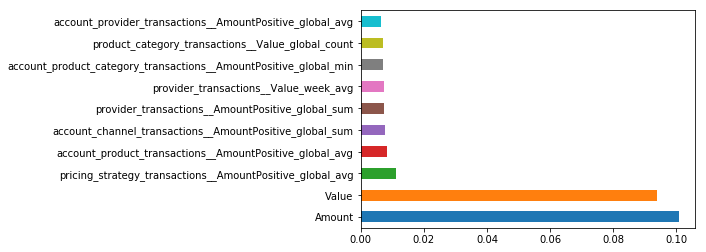

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_trn_cut.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
feat_importances.nlargest(10)

Amount                                                              0.100936
Value                                                               0.093843
pricing_strategy_transactions__AmountPositive_global_avg            0.011344
account_product_transactions__AmountPositive_global_avg             0.008296
account_channel_transactions__AmountPositive_global_sum             0.007823
provider_transactions__AmountPositive_global_sum                    0.007411
provider_transactions__Value_week_avg                               0.007362
account_product_category_transactions__AmountPositive_global_min    0.007006
product_category_transactions__Value_global_count                   0.006948
account_provider_transactions__AmountPositive_global_avg            0.006551
dtype: float64

## Correlation Matrix with Heatmap

Heatmap makes it easy to identify which features are most related to the target variable

In [53]:
#get correlations of each features in dataset
corrmat = df_trn_cut.corr()
top_corr_features = corrmat.index

In [54]:
import seaborn as sns

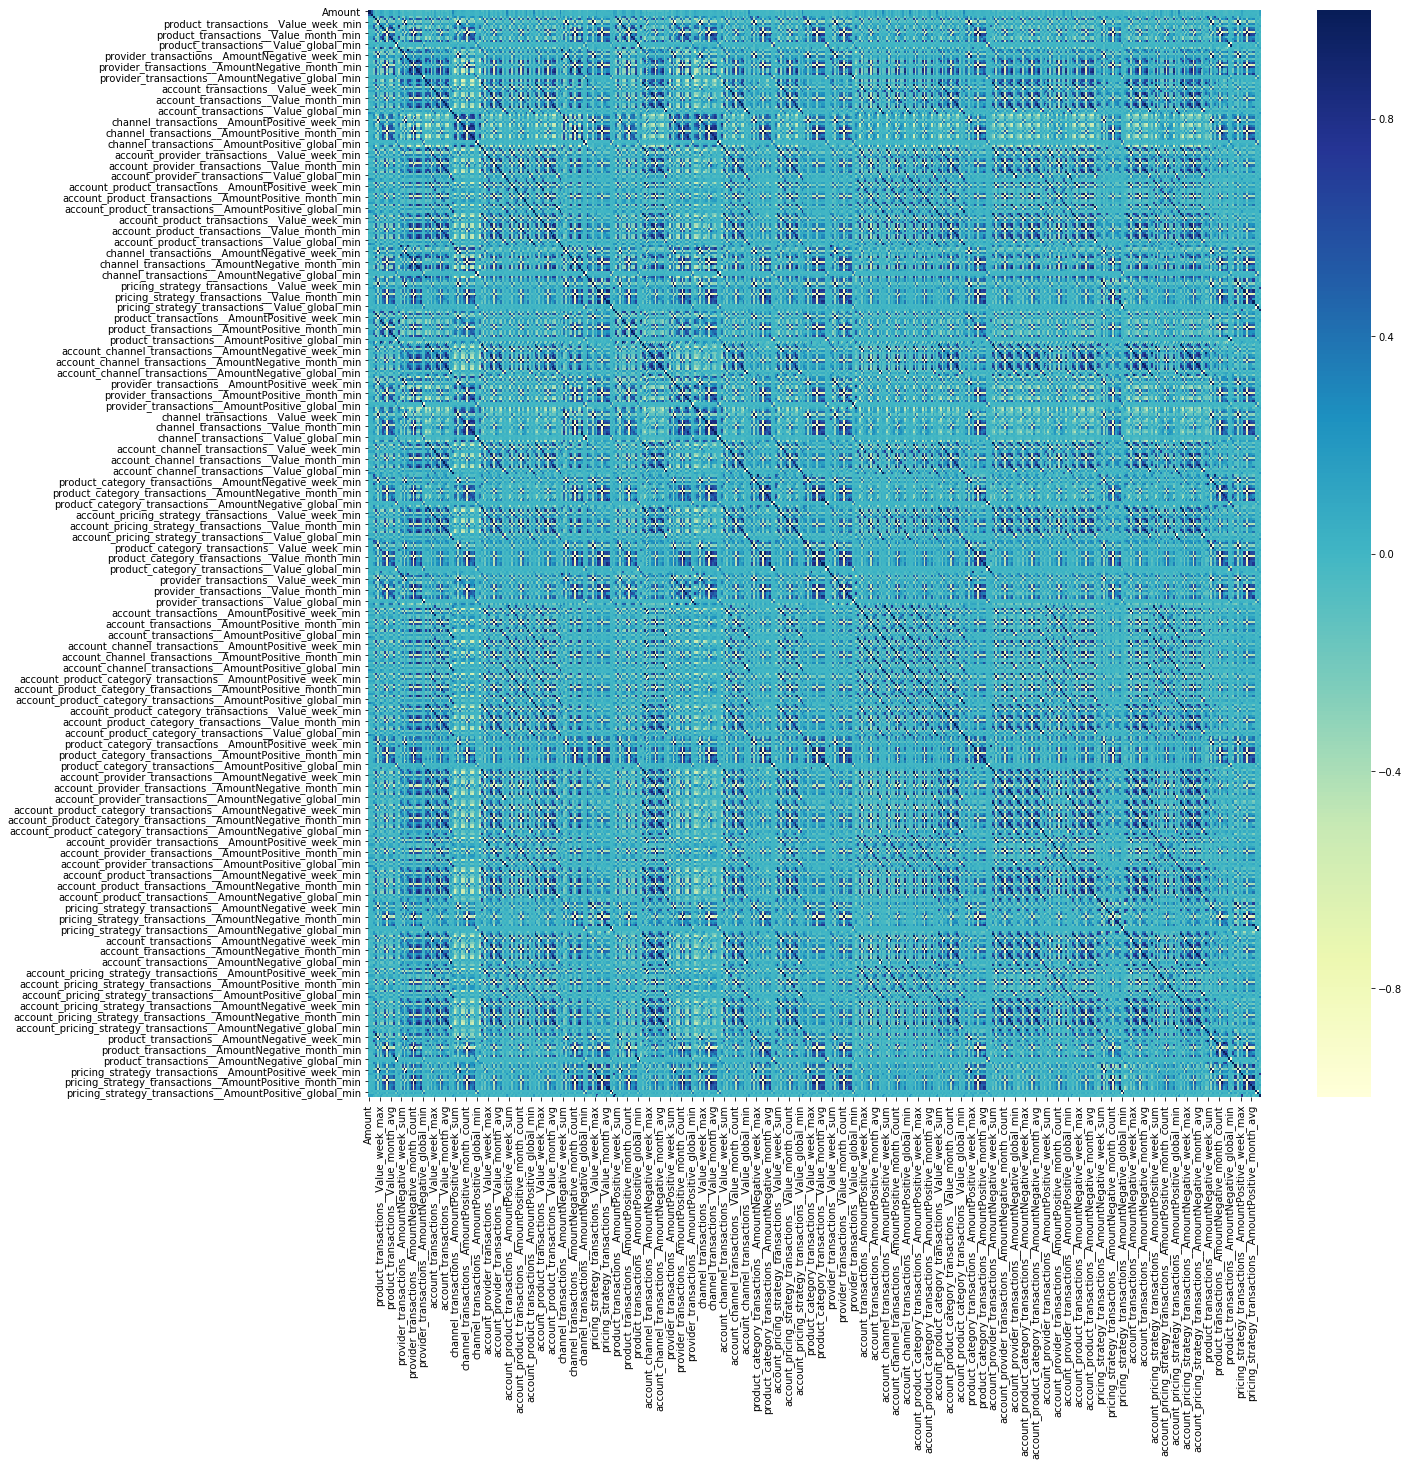

In [55]:
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_trn_cut[top_corr_features].corr(),
#               annot=True,
#               cmap="RdYlGn"
              cmap ="YlGnBu"
             )

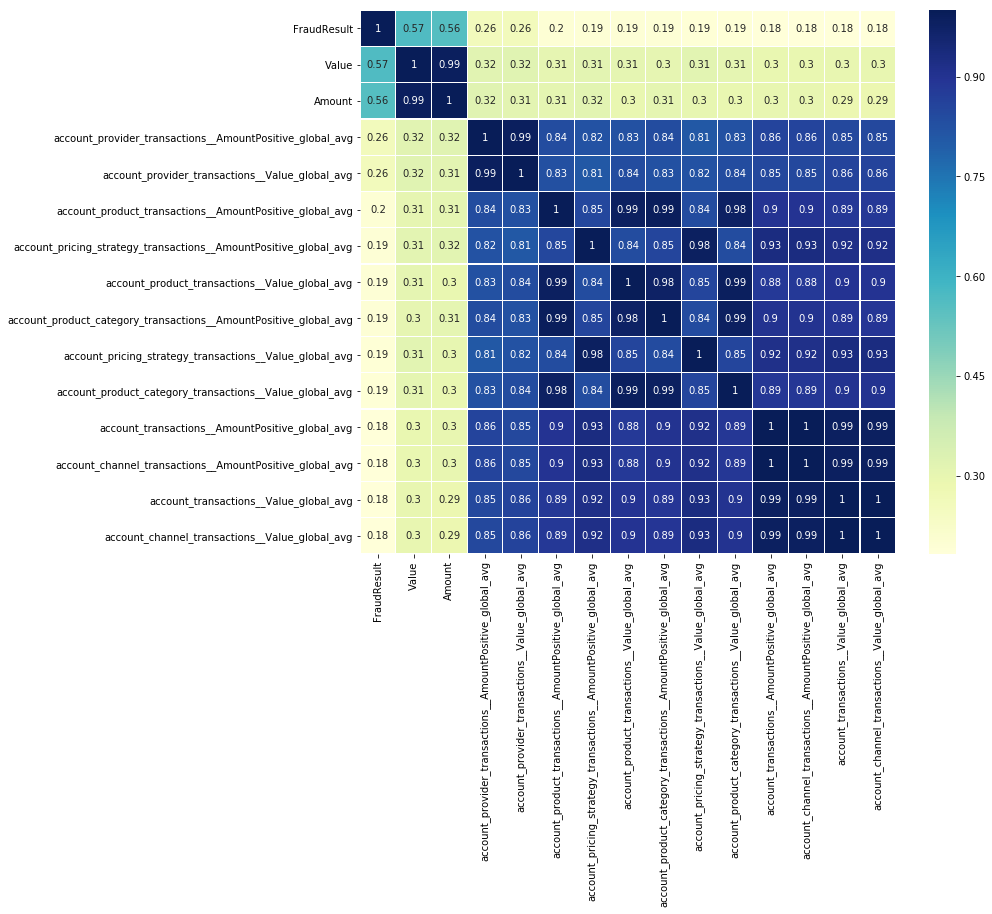

In [56]:
# FraudResult correlation matrix 
# k : number of variables for heatmap 
k = 15
  
cols = corrmat.nlargest(k, 'FraudResult')['FraudResult'].index 
  
cm = np.corrcoef(df_trn_cut[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, annot=True, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)

In [57]:
corrmat['FraudResult'].sort_values(ascending=False).head(11)

FraudResult                                                         1.000000
Value                                                               0.566739
Amount                                                              0.557370
account_provider_transactions__AmountPositive_global_avg            0.258355
account_provider_transactions__Value_global_avg                     0.255773
account_product_transactions__AmountPositive_global_avg             0.195453
account_pricing_strategy_transactions__AmountPositive_global_avg    0.193866
account_product_transactions__Value_global_avg                      0.192689
account_product_category_transactions__AmountPositive_global_avg    0.191969
account_pricing_strategy_transactions__Value_global_avg             0.190931
account_product_category_transactions__Value_global_avg             0.189333
Name: FraudResult, dtype: float64